In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime

In [2]:
caiso_sp = 'SP15 EZ Gen DA LMP Peak'
caiso_np = 'NP15 EZ Gen DA LMP Peak'

---
## ICE Wholesale Price 2014 to 2020

In [3]:
# Time-related variables are 
ice_cols = ['price_hub', 'trade_date', 'delivery_start', 'delivery_end', 'high_price_$_mwh', 'low_price_$_mwh', 'wtd_avg_price_$_mwh', 'change', 'daily_vol_mwh', 'num_trades', 'num_counterparties']

ice14 = pd.read_excel('data/ice_electric-2014final.xls', names=ice_cols)
ice15 = pd.read_excel('data/ice_electric-2015final.xls', names=ice_cols)
ice16 = pd.read_excel('data/ice_electric-2016final.xls', names=ice_cols)
ice17 = pd.read_excel('data/ice_electric-2017final.xlsx', names=ice_cols)
ice18 = pd.read_excel('data/ice_electric-2018final.xlsx', names=ice_cols)
ice19 = pd.read_excel('data/ice_electric-2019final.xlsx', names=ice_cols)
ice20 = pd.read_excel('data/ice_electric-2020.xlsx', names=ice_cols)

ice_df_list=[ice14, ice15, ice16, ice17, ice18, ice19, ice20]
init_years = list(range(14,21))

In [4]:
def col_to_date(df):
    for d in df:
        d['trade_date'] = pd.to_datetime(d['trade_date'])
        d['delivery_start'] = pd.to_datetime(d['delivery_start'])
        d['delivery_end_date'] = pd.to_datetime(d['delivery_end_date'])

In [5]:
def create_df_sub(df_list, hub_name, keys_names, dict_name):
    for df, k in zip(df_list, keys_names):
        dict_name[k] =  df[df['price_hub'] == hub_name].copy()
        dict_name[k].drop('price_hub', axis=1, inplace=True)

In [6]:
np_dict = {}
sp_dict = {}
create_df_sub(ice_df_list, caiso_np, init_years, np_dict)
create_df_sub(ice_df_list, caiso_sp, init_years, sp_dict)

In [7]:
np_df = pd.concat(np_dict.values()).reset_index()
sp_df = pd.concat(sp_dict.values()).reset_index()

In [8]:
np_df.tail()


,index,trade_date,delivery_start,delivery_end,high_price_$_mwh,low_price_$_mwh,wtd_avg_price_$_mwh,change,daily_vol_mwh,num_trades,num_counterparties
566,194,2020-02-10,2020-02-11,2020-02-11,28.00,28.00,28.00,-2.28,400,1,2
567,195,2020-03-10,2020-03-11,2020-03-11,31.50,31.50,31.50,3.50,400,1,2
568,196,2020-03-11,2020-03-12,2020-03-12,35.25,35.25,35.25,3.75,800,2,2
569,197,2020-04-13,2020-04-14,2020-04-14,23.00,23.00,23.00,-12.25,400,1,2
570,198,2020-04-30,2020-05-01,2020-05-02,13.75,13.50,13.60,-9.40,4000,5,3


In [10]:
np_date_df = pd.DataFrame({'trade_date':pd.date_range(start='2014-01-01', end='2020-05-19')})
np_df_14_now = pd.merge(np_date_df, np_df, on='trade_date', how='left')
sp_date_df = pd.DataFrame({'trade_date':pd.date_range(start='2014-01-01', end='2020-05-19')})
sp_df_14_now = pd.merge(sp_date_df, sp_df, on='trade_date', how='left')

Text(0.5, 1.0, 'NP Price - 2014 to Present')

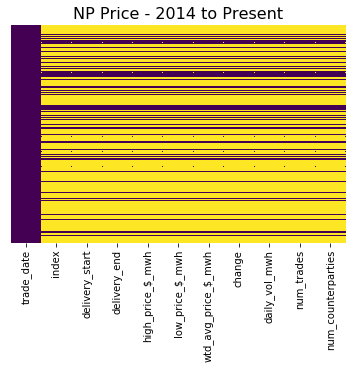

In [15]:
sns.heatmap(np_df_14_now.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('NP Price - 2014 to Present', fontsize=16)

In [22]:
np_df_14_now.head()

,trade_date,index,delivery_start,delivery_end,high_price_$_mwh,low_price_$_mwh,wtd_avg_price_$_mwh,change,daily_vol_mwh,num_trades,num_counterparties
0,2014-01-01,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-02,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-03,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-04,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-01-05,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'SP Price - 2014 to Present')

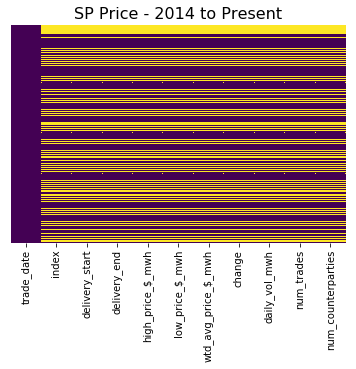

In [14]:
sns.heatmap(sp_df_14_now.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('SP Price - 2014 to Present', fontsize=16)

---
## Create Master Dataset for CAISO NP-15 and SP-15

In [17]:
ice_np_01_13 = pd.read_excel('data/NP 15 Hub.xls', names=ice_cols)
ice_sp1_01_13 = pd.read_excel('data/SP 15_1 Hub.xls', names=ice_cols)
ice_sp2_01_13 = pd.read_excel('data/SP 15_2 Hub.xls', names=ice_cols)

ice_np_01_13.drop('price_hub', axis=1, inplace=True)
ice_sp1_01_13.drop('price_hub', axis=1, inplace=True)
ice_sp2_01_13.drop('price_hub', axis=1, inplace=True)

calendar_01_now = pd.DataFrame({'trade_date':pd.date_range(start='2001-01-01', end='2020-05-19')})

In [104]:
# Create master NP dataset from 1/1/01 to 5/19/20.
# Remove duplicate values
np_concat = pd.concat([np_df_01_13, np_df_14_now], axis=0, sort=False)
np_master = pd.merge(calendar_01_now, np_concat, how='left', on='trade_date').reset_index()
np_duplicate = np_master.duplicated(subset='trade_date', keep='first')
np_dup_idx = np_duplicate[np_duplicate==True].index.values.tolist()
np_master.drop(index=np_dup_idx, inplace=True)
np_master.drop(['level_0', 'index'], axis=1, inplace=True)

In [105]:
# Remove trade_date duplicates.

np_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7079 entries, 0 to 7094
Data columns (total 10 columns):
trade_date             7079 non-null datetime64[ns]
delivery_start         1565 non-null datetime64[ns]
delivery_end           1565 non-null datetime64[ns]
high_price_$_mwh       1565 non-null float64
low_price_$_mwh        1565 non-null float64
wtd_avg_price_$_mwh    1565 non-null float64
change                 1564 non-null float64
daily_vol_mwh          1565 non-null float64
num_trades             1565 non-null float64
num_counterparties     1565 non-null float64
dtypes: datetime64[ns](3), float64(7)
memory usage: 608.4 KB


In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(np_master.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('CAISO NP-15 - 1/1/01 to 5/19/20', fontsize=16, fontweight='bold');

In [107]:
# Create master SP dataset from 1/1/01 to 5/19/20.
# Remove duplicate values
sp_concat = pd.concat([ice_sp1_01_13, ice_sp2_01_13, sp_df_14_now], axis=0, sort=False)
sp_master = pd.merge(calendar_01_now, sp_concat, how='left', on='trade_date').reset_index()
sp_duplicate = sp_master.duplicated(subset='trade_date', keep='first')
sp_dup_idx = sp_duplicate[sp_duplicate==True].index.values.tolist()
sp_master.drop(index=sp_dup_idx, inplace=True)
sp_master.drop(['level_0', 'index'], axis=1, inplace=True)

In [108]:
sp_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7079 entries, 0 to 7120
Data columns (total 10 columns):
trade_date             7079 non-null datetime64[ns]
delivery_start         4603 non-null datetime64[ns]
delivery_end           4603 non-null datetime64[ns]
high_price_$_mwh       4603 non-null float64
low_price_$_mwh        4603 non-null float64
wtd_avg_price_$_mwh    4603 non-null float64
change                 4602 non-null object
daily_vol_mwh          4603 non-null float64
num_trades             4603 non-null float64
num_counterparties     4603 non-null float64
dtypes: datetime64[ns](3), float64(6), object(1)
memory usage: 608.4+ KB


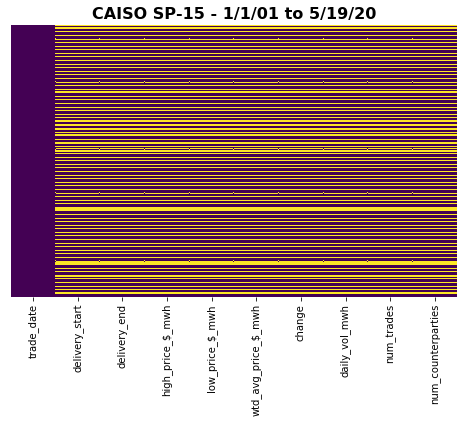

In [110]:
plt.figure(figsize=(8,5))
sns.heatmap(sp_master.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('CAISO SP-15 - 1/1/01 to 5/19/20', fontsize=16, fontweight='bold');

---
## Natural Gas

In [111]:
# Henry Hub Natural gas Spot Price (USD per Million Btu)
natgas = pd.read_excel('data/nat_gas.xls',sheet_name='Data 1', names=['trade_date', 'spot_price'], skiprows=2)
natgas_sub = natgas[natgas['trade_date'] > '2000-12-31'].copy().reset_index()
calendar_01_now = pd.DataFrame({'trade_date':pd.date_range(start='2001-01-01', end='2020-05-19')})
natgas_master = pd.merge(calendar_01_now, natgas, how='left', on='trade_date')
natgas_master.head()

,trade_date,spot_price
0,2001-01-01,NaN
1,2001-01-02,9.97
2,2001-01-03,9.71
3,2001-01-04,9.45
4,2001-01-05,10.03


In [112]:
natgas_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7079 entries, 0 to 7078
Data columns (total 2 columns):
trade_date    7079 non-null datetime64[ns]
spot_price    4881 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 165.9 KB


In [70]:
natgas_sub.tail()

,index,trade_date,spot_price
4883,5882,2020-05-21,1.75
4884,5883,2020-05-22,1.70
4885,5884,2020-05-26,1.79
4886,5885,2020-05-27,1.78
4887,5886,2020-05-28,1.79


In [67]:
natgas_sub_2 = natgas[natgas['trade_date'] > '2000-12-31'].copy().reset_index()